In [1]:
# Get to right working directory. 
%cd /Users/dcox/Dropbox/Projects/CurrentProjectManuscripts/Empirical/PersonalFun/Matching/KaggleWebscrapingAnalysis/data

/Users/dcox/Dropbox/Projects/CurrentProjectManuscripts/Empirical/PersonalFun/Matching/KaggleWebscrapingAnalysis/data


In [2]:
# Packages!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [4]:
# Read in data
at_bats = pd.read_csv('atbats.csv')
games = pd.read_csv('games.csv')
pitches = pd.read_csv('pitches.csv')
data = pd.read_csv('merged_data.csv')
data = data.drop(['Unnamed: 0'], axis=1)
df = data.copy()

In [ ]:
# Left join pitches and at_bats on ab_id column
data = pitches.merge(at_bats, on='ab_id', how='left')
data.to_csv('merged_data.csv')

In [5]:
df.dtypes

px                 float64
pz                 float64
start_speed        float64
end_speed          float64
spin_rate          float64
spin_dir           float64
break_angle        float64
break_length       float64
break_y            float64
ax                 float64
ay                 float64
az                 float64
sz_bot             float64
sz_top             float64
type_confidence    float64
vx0                float64
vy0                float64
vz0                float64
x                  float64
x0                 float64
y                  float64
y0                 float64
z0                 float64
pfx_x              float64
pfx_z              float64
nasty              float64
zone               float64
code                object
type                object
pitch_type          object
event_num            int64
b_score            float64
ab_id              float64
b_count            float64
s_count            float64
outs               float64
pitch_num          float64
o

In [6]:
# Create one df for objects and one df for ints
data_obj = ['code', 'type', 'pitch_type', 'event', 'p_throws', 'stand', 'top']
data_objs = data[data_obj]
data_ints = data.drop(data[data_obj], axis=1)
data_ints_cols = list(data_ints)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ee9e250>,
      dtype=object)

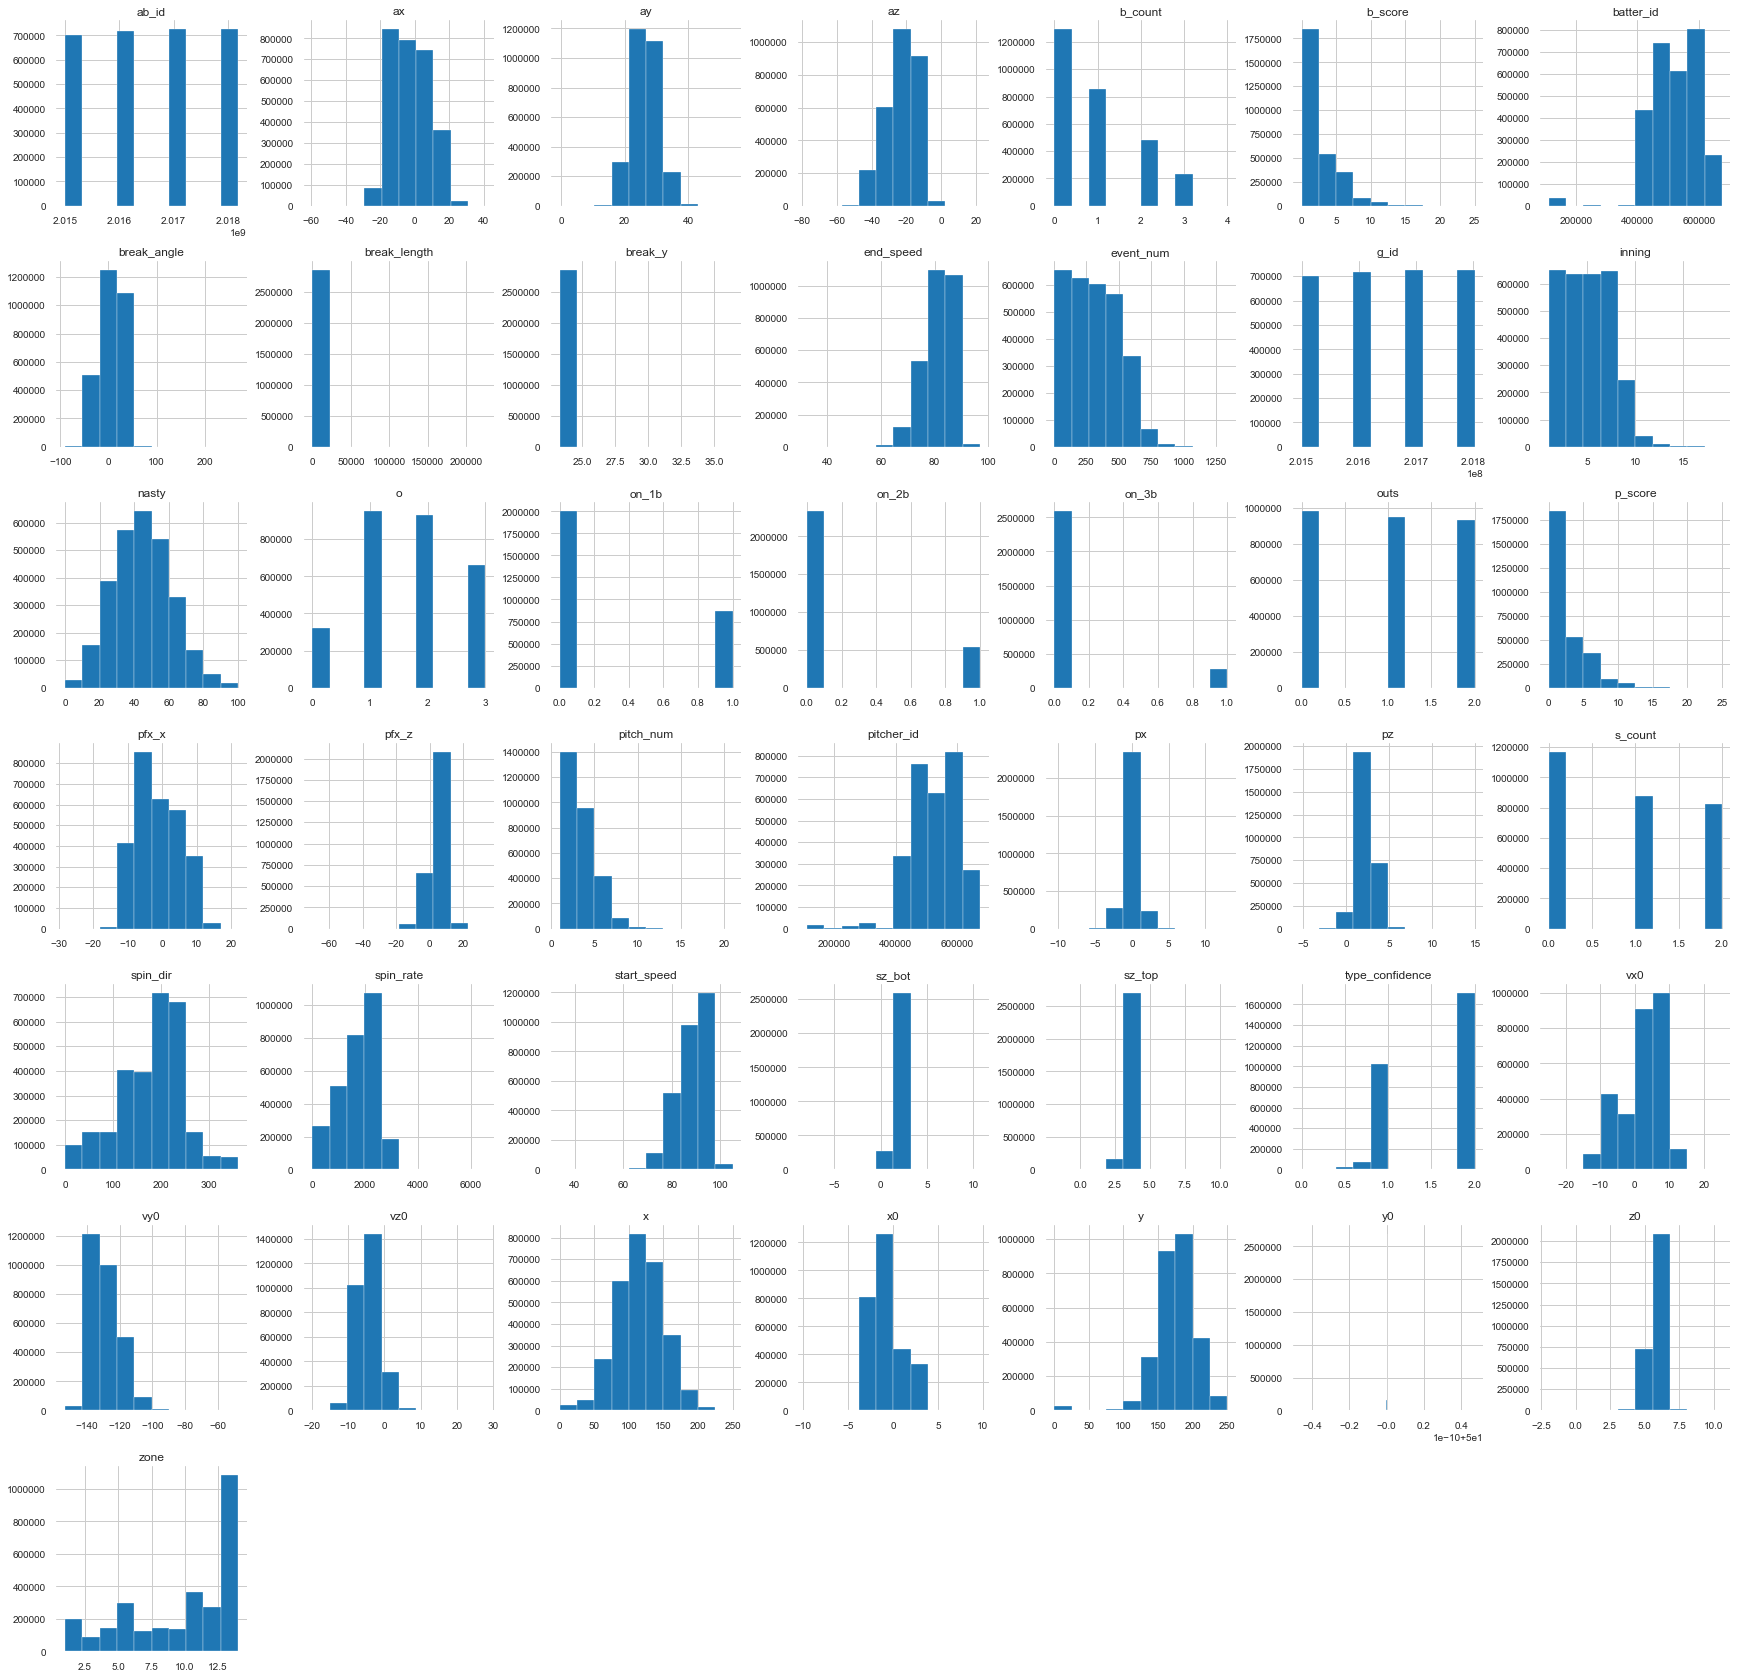

In [7]:
# Histograms of 
data_ints.hist(figsize=(30, 30))

[Text(0.5, 0, 'px'),
 Text(1.5, 0, 'pz'),
 Text(2.5, 0, 'start_speed'),
 Text(3.5, 0, 'end_speed'),
 Text(4.5, 0, 'spin_rate'),
 Text(5.5, 0, 'spin_dir'),
 Text(6.5, 0, 'break_angle'),
 Text(7.5, 0, 'break_length'),
 Text(8.5, 0, 'break_y'),
 Text(9.5, 0, 'ax'),
 Text(10.5, 0, 'ay'),
 Text(11.5, 0, 'az'),
 Text(12.5, 0, 'sz_bot'),
 Text(13.5, 0, 'sz_top'),
 Text(14.5, 0, 'type_confidence'),
 Text(15.5, 0, 'vx0'),
 Text(16.5, 0, 'vy0'),
 Text(17.5, 0, 'vz0'),
 Text(18.5, 0, 'x'),
 Text(19.5, 0, 'x0'),
 Text(20.5, 0, 'y'),
 Text(21.5, 0, 'y0'),
 Text(22.5, 0, 'z0'),
 Text(23.5, 0, 'pfx_x'),
 Text(24.5, 0, 'pfx_z'),
 Text(25.5, 0, 'nasty'),
 Text(26.5, 0, 'zone'),
 Text(27.5, 0, 'event_num'),
 Text(28.5, 0, 'b_score'),
 Text(29.5, 0, 'ab_id'),
 Text(30.5, 0, 'b_count'),
 Text(31.5, 0, 's_count'),
 Text(32.5, 0, 'outs'),
 Text(33.5, 0, 'pitch_num'),
 Text(34.5, 0, 'on_1b'),
 Text(35.5, 0, 'on_2b'),
 Text(36.5, 0, 'on_3b'),
 Text(37.5, 0, 'batter_id'),
 Text(38.5, 0, 'g_id'),
 Text(39.5, 0,

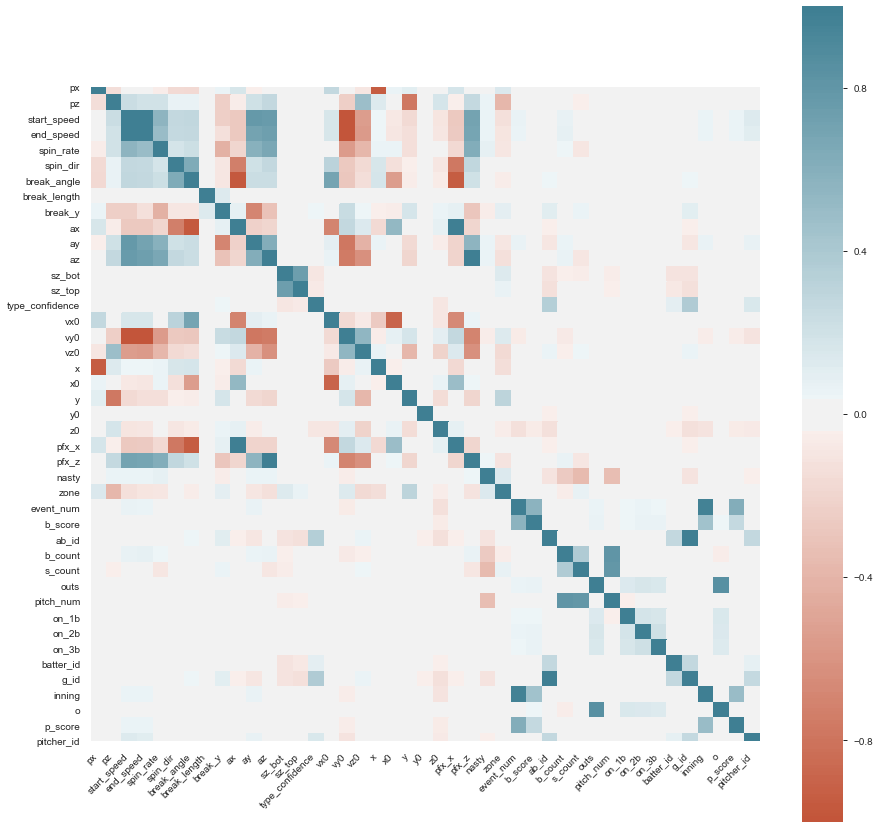

In [23]:
# Correlation matrix
corr = data_ints.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

In [9]:
# Determine how many at-bats each player had across the three years
ab_counts = []
pitches_seen = []
games_played = []
for i in players:
    rows = df.loc[df['batter_id']==i]
    ab_count = len(rows['ab_id'].unique())
    pitches = len(rows)
    games = len(rows['g_id'].unique())
    ab_counts.append(ab_count)
    pitches_seen.append(pitches)
    games_played.append(games)

Text(0.5, 0, 'Number of Games Played')

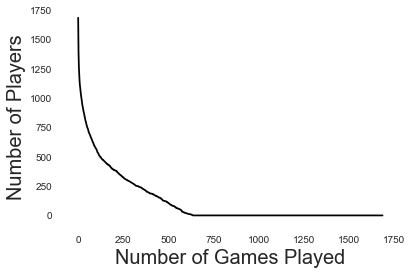

In [11]:
# See how many players we have available based on different cutoffs of total games played. 
vals = list(range(0, len(games_played)))
num_remain = []
for i in vals:
    count = len([1 for j in games_played if j >i])
    num_remain.append(count)
plt.plot(num_remain, color='black')
plt.ylabel('Number of Players', fontsize=20)
plt.xlabel('Number of Games Played', fontsize=20)

Text(0.5, 0, 'Number of At-Bats')

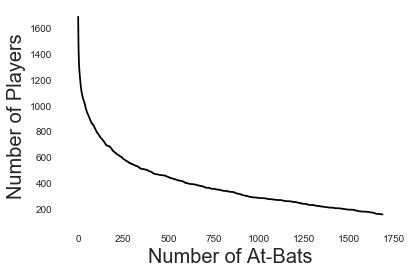

In [12]:
# See how many players we have available based on different cutoffs of number of at-bats played. 
vals = list(range(0, len(ab_counts)))
num_remain = []
for i in vals:
    count = len([1 for j in ab_counts if j >i])
    num_remain.append(count)
plt.plot(num_remain, color='black')
plt.ylabel('Number of Players', fontsize=20)
plt.xlabel('Number of At-Bats', fontsize=20)

Text(0.5, 0, 'Number of Pitches Seen')

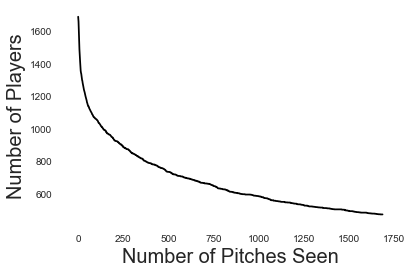

In [13]:
# See how many players we have available based on different cutoffs of number of pitches seen. 
vals = list(range(0, len(pitches_seen)))
num_remain = []
for i in vals:
    count = len([1 for j in pitches_seen if j >i])
    num_remain.append(count)
plt.plot(num_remain, color='black')
plt.ylabel('Number of Players', fontsize=20)
plt.xlabel('Number of Pitches Seen', fontsize=20)